<a href="https://colab.research.google.com/github/aakshataaa/Breast_cancer_prediction/blob/main/Breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving breast_cancer_dataset_100_samples.xlsx to breast_cancer_dataset_100_samples.xlsx


In [2]:
import pandas as pd

df = pd.read_excel("breast_cancer_dataset_100_samples.xlsx")
df.head()

,Age,Family_History,Lump_Duration_Months,Pain,Breast_Density,Mass_Size_cm,Mass_Shape,Mass_Margins,Calcifications,Echotexture,Lymph_Node_Size_cm,Tumor_Type,Tumor_Grade,ER_Status,PR_Status,HER2_Status,Ki67_Index,Cancer_Stage
0,68,0,10,NaN,B,0.61,Irregular,Smooth,0,Complex,2.36,ILC,2,71,90,Negative,43,Stage II B
1,58,1,7,Mild,C,4.83,Oval,Spiculated,0,Hypoechoic,1.58,Benign,1,53,39,Negative,24,Stage IV
2,44,0,9,NaN,C,4.26,Irregular,Spiculated,0,Cystic,0.82,Benign,1,66,97,Positive,9,Stage II B
3,72,1,7,Mild,B,3.63,Round,Smooth,1,Cystic,1.21,IDC,2,50,11,Positive,5,Stage II B
4,37,1,1,NaN,B,2.34,Round,Lobulated,1,Cystic,1.41,IDC,1,96,52,Positive,34,Stage II B


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Target
y = df["Cancer_Stage"]

# Features
X = df.drop("Cancer_Stage", axis=1)

# Categorical & numerical columns
categorical_cols = X.select_dtypes(include=["object"]).columns
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns

# Encoding target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Preprocessing (scale numeric, one-hot categorical)
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ]
)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)


In [5]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(n_estimators=300, random_state=42))
])

model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Age', 'Family_History', 'Lump_Duration_Months', 'Mass_Size_cm',
       'Calcifications', 'Lymph_Node_Size_cm', 'Tumor_Grade', 'ER_Status',
       'PR_Status', 'Ki67_Index'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Pain', 'Breast_Density', 'Mass_Shape', 'Mass_Margins', 'Echotexture',
       'Tumor_Type', 'HER2_Status'],
      dtype='object'))])),
                ('classifier',
                 RandomForestClassifier(n_estimators=300, random_state=42))])

Accuracy: 0.4

Classification Report:
               precision    recall  f1-score   support

     Stage I       0.00      0.00      0.00         3
  Stage II A       0.36      0.83      0.50         6
  Stage II B       0.00      0.00      0.00         3
   Stage III       0.50      0.50      0.50         6
    Stage IV       0.00      0.00      0.00         2

    accuracy                           0.40        20
   macro avg       0.17      0.27      0.20        20
weighted avg       0.26      0.40      0.30        20



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


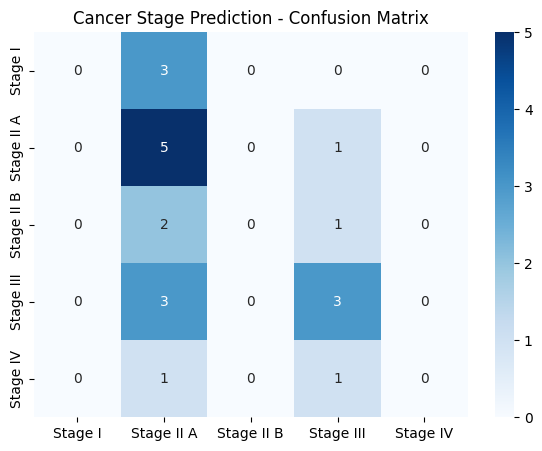

In [6]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Cancer Stage Prediction - Confusion Matrix")
plt.show()


In [7]:
new_patient = pd.DataFrame([{
    "Age": 46,
    "Family_History": 1,
    "Lump_Duration_Months": 3,
    "Pain": "Mild",
    "Breast_Density": "C",
    "Mass_Size_cm": 2.8,
    "Mass_Shape": "Irregular",
    "Mass_Margins": "Spiculated",
    "Calcifications": 1,
    "Echotexture": "Hypoechoic",
    "Lymph_Node_Size_cm": 1.5,
    "Tumor_Type": "IDC",
    "Tumor_Grade": 2,
    "ER_Status": 85,
    "PR_Status": 65,
    "HER2_Status": "Negative",
    "Ki67_Index": 18
}])

prediction = model.predict(new_patient)
print("Predicted Cancer Stage:", le.inverse_transform(prediction)[0])


Predicted Cancer Stage: Stage III


In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
import joblib

df = pd.read_excel("breast_cancer_dataset_100_samples.xlsx")

y = df["Cancer_Stage"]
X = df.drop("Cancer_Stage", axis=1)

categorical_cols = X.select_dtypes(include=["object"]).columns
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns

le = LabelEncoder()
y_encoded = le.fit_transform(y)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ]
)

model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(n_estimators=300, random_state=42))
])

model.fit(X, y_encoded)

joblib.dump(model, "cancer_stage_model.pkl")
joblib.dump(le, "label_encoder.pkl")
print("Model saved successfully!")

Model saved successfully!


In [15]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

st.set_page_config(page_title="Breast Cancer Stage Predictor", layout="centered")

st.title("🔬 Breast Cancer Stage Prediction Dashboard")
st.subheader("Enter patient details to predict cancer stage")

model = joblib.load("cancer_stage_model.pkl")
label_encoder = joblib.load("label_encoder.pkl")

# ---- Sidebar Inputs ----
st.sidebar.header("Patient Information")

Age = st.sidebar.number_input("Age", 20, 90, 45)
Family_History = st.sidebar.selectbox("Family History", [0, 1])
Lump_Duration_Months = st.sidebar.number_input("Lump Duration (Months)", 1, 24, 3)
Pain = st.sidebar.selectbox("Pain Level", ["None", "Mild", "Moderate"])
Breast_Density = st.sidebar.selectbox("Breast Density", ["A", "B", "C", "D"])
Mass_Size_cm = st.sidebar.number_input("Mass Size (cm)", 0.1, 7.0, 2.8)
Mass_Shape = st.sidebar.selectbox("Mass Shape", ["Round", "Oval", "Irregular"])
Mass_Margins = st.sidebar.selectbox("Mass Margins", ["Smooth", "Lobulated", "Spiculated"])
Calcifications = st.sidebar.selectbox("Calcifications Present?", [0, 1])
Echotexture = st.sidebar.selectbox("Echotexture", ["Hypoechoic", "Complex", "Cystic"])
Lymph_Node_Size_cm = st.sidebar.number_input("Lymph Node Size (cm)", 0.1, 5.0, 1.5)
Tumor_Type = st.sidebar.selectbox("Tumor Type", ["IDC", "ILC", "Benign"])
Tumor_Grade = st.sidebar.selectbox("Tumor Grade", [1, 2, 3])
ER_Status = st.sidebar.number_input("ER Status (%)", 0, 100, 85)
PR_Status = st.sidebar.number_input("PR Status (%)", 0, 100, 65)
HER2_Status = st.sidebar.selectbox("HER2 Status", ["Positive", "Negative"])
Ki67_Index = st.sidebar.number_input("Ki-67 Index (%)", 1, 80, 18)

input_data = pd.DataFrame([{
    "Age": Age,
    "Family_History": Family_History,
    "Lump_Duration_Months": Lump_Duration_Months,
    "Pain": Pain,
    "Breast_Density": Breast_Density,
    "Mass_Size_cm": Mass_Size_cm,
    "Mass_Shape": Mass_Shape,
    "Mass_Margins": Mass_Margins,
    "Calcifications": Calcifications,
    "Echotexture": Echotexture,
    "Lymph_Node_Size_cm": Lymph_Node_Size_cm,
    "Tumor_Type": Tumor_Type,
    "Tumor_Grade": Tumor_Grade,
    "ER_Status": ER_Status,
    "PR_Status": PR_Status,
    "HER2_Status": HER2_Status,
    "Ki67_Index": Ki67_Index
}])

if st.button("Predict Cancer Stage"):
    prediction = model.predict(input_data)
    result = label_encoder.inverse_transform(prediction)[0]

    st.success(f"🎯 Predicted Cancer Stage: **{result}**")


Overwriting app.py


In [16]:
from pyngrok import ngrok
ngrok.set_auth_token("32pY8j7eJTpj7gkPpouj0vxrJLS_6iPYhYi5pTnLkJaYhefPn")
ngrok.kill()


In [17]:
get_ipython().system_raw("streamlit run app.py --server.port 8501 &")
public_url = ngrok.connect(8501)
public_url


<NgrokTunnel: "https://8b77a262c6a2.ngrok-free.app" -> "http://localhost:8501">

In [ ]:
# !pip install tabula-py
#!apt-get install -y openjdk-11-jdk  # tabula requires Java
# if pdf have a table then only use it
